# Make postISRCCD from raw for Spectractor StandAlone


- work with Weakly_2023_44


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/09/13
- last update : 2024/02/01



write output file according hierarchy

         filter/DATE


In [1]:
! eups list -s | grep LOCAL

analysis_tools        LOCAL:/home/d/dagoret/repos/repos_w_2023_44/analysis_tools 	setup
atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_44/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/eups 	setup
spectractor           LOCAL:/home/d/dagoret/repos/repos_w_2023_44/Spectractor 	setup


In [2]:
! echo $IMAGE_DESCRIPTION
! eups list -s lsst_distrib

Weekly 2023_44
   g4213664e8e+d053631def 	current w_2023_44 setup


In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch

from astropy.io import fits

In [4]:
# Assembly task
# https://github.com/lsst/ip_isr/blob/main/python/lsst/ip/isr/isrTask.py

from lsst.ip.isr.assembleCcdTask import (AssembleCcdConfig, AssembleCcdTask)
from lsst.ip.isr.isrTask import (IsrTask, IsrTaskConfig)

#https://github.com/lsst/ip_isr/blob/main/python/lsst/ip/isr/overscan.py
from lsst.ip.isr import  OverscanCorrectionTaskConfig, OverscanCorrectionTask

In [5]:
# LSST Display
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [6]:
import lsst.daf.butler as dafButler

In [7]:
import warnings
warnings.filterwarnings("ignore")

# Configuration

In [8]:
FLAG_PLOT=True

In [9]:
#DATE = 20230117
#FILTER="empty-holo4_003"
#FILTER="BG40_65mm_1-holo4_003"
#FILTER="OG550_65mm_1-holo4_003"

#DATE = 20230118
#FILTER = "BG40_65mm_1-holo4_003"
#FILTER = "OG550_65mm_1-holo4_003"
#FILTER = "empty-holo4_003"

#DATE = 20230119
#FILTER="empty-holo4_003"
#FILTER="BG40_65mm_1-holo4_003"
#FILTER="OG550_65mm_1-holo4_003"

#DATE = 20230131
#FILTER = "empty-holo4_003"
#FILTER="BG40_65mm_1-holo4_003"
#FILTER="OG550_65mm_1-holo4_003"


#DATE = 20230201
#FILTER = "empty-holo4_003"
#FILTER="BG40_65mm_1-holo4_003"
#FILTER="OG550_65mm_1-holo4_003"


#DATE = 20230202
#FILTER = "empty-holo4_003"
#FILTER="BG40_65mm_1-holo4_003"
#FILTER="OG550_65mm_1-holo4_003"

#DATE = 20230215
#FILTER="empty-holo4_003"


#DATE = 20230315
#FILTER="empty-holo4_003"

#DATE = 20230316
#FILTER="empty-holo4_003"

#DATE = 20230704
#FILTER = "empty-holo4_003"

#DATE = 20230705
#FILTER = "empty-holo4_003"

#DATE = 20230706
#FILTER = "empty-holo4_003"


#DATE = 20230718
#FILTER = "empty-holo4_003"

#DATE = 20230720
#FILTER = "empty-holo4_003"

#DATE = 20230801
#FILTER = "empty-holo4_003"

#DATE = 20230802
#FILTER = "empty-holo4_003"

#DATE = 20230815
#FILTER = "empty-holo4_003"

#DATE = 20230817
#FILTER = "empty-holo4_003"


#DATE = 20230912
#FILTER="cyl_lens~holo4_001"
#FILTER="cyl_lens~holo4_003"
#FILTER="collimator~holo4_003"
#FILTER="empty~holo4_001"
#FILTER="empty~holo4_003"

#DATE = 20230913
#FILTER="collimator~holo4_003"
#FILTER="cyl_lens~holo4_003"
#FILTER="empty~holo4_003"
#FILTER="empty~holo4_001"

#DATE = 20230914
#FILTER="collimator~holo4_003"
#FILTER="cyl_lens~holo4_003"
#FILTER="empty~holo4_003"
#FILTER="empty~holo4_001"



############### 2021 ##############  In repo main
#-rw-r--r-- 1 dagoret rubin_users 338 Dec 20 01:35 visitdispersers_20211006_filt_BG40-holo4_003.list
#-rw-r--r-- 1 dagoret rubin_users 338 Dec 20 01:35 visitdispersers_20211006_filt_empty-holo4_003.list
#-rw-r--r-- 1 dagoret rubin_users 338 Dec 20 01:35 visitdispersers_20211006_filt_FELH0600-holo4_003.list
#-rw-r--r-- 1 dagoret rubin_users 338 Dec 20 01:35 visitdispersers_20211006_filt_SDSSg-holo4_003.list


#DATE = 20211006
#FILTER="SDSSg-holo4_003"
#FILTER="BG40-holo4_003"
#FILTER="collimator-holo4_003"
#FILTER="empty-holo4_003"

#-rw-r--r-- 1 dagoret rubin_users 442 Dec 20 01:36 visitdispersers_20211103_filt_BG40-holo4_003.list
#-rw-r--r-- 1 dagoret rubin_users 442 Dec 20 01:36 visitdispersers_20211103_filt_empty-holo4_003.list
#-rw-r--r-- 1 dagoret rubin_users 559 Dec 20 01:36 visitdispersers_20211103_filt_FELH0600-holo4_003.list
#-rw-r--r-- 1 dagoret rubin_users 442 Dec 20 01:36 visitdispersers_20211103_filt_SDSSg-holo4_003.list


#DATE = 20211103
#FILTER="SDSSg-holo4_003"
#FILTER="BG40-holo4_003"
#FILTER="collimator-holo4_003"
#FILTER="empty-holo4_003"


#DATE = 20240130
#FILTER="SDSSg-holo4_003"
#FILTER="BG40-holo4_003"
#FILTER="collimator-holo4_003"
#FILTER="empty-holo4_003"

#- 20240709
#- 20240710
#- 20240711
#- 20240715
#- 20240716
#- 20240717
#- 20240724
#- 20240729


DATE = 20240729
#FILTER="collimator-holo4_003"
#FILTER="cyl_lens-holo4_003"
FILTER="empty-holo4_003"
#FILTER="empty-holo4_001"



#filename_visits = f"visitdispersers_{DATE}_filt_{FILTER}.list"
filename_visits = f"all_visitdispersers/{DATE}/visitdispersers_{DATE}_filt_{FILTER}.list"

In [10]:
# output path of type top/date/filter
#----------------------------------------

top_path_out="my_postisrccd_img"
path_out=f"{top_path_out}/{FILTER}"

In [11]:
if not os.path.exists(path_out):
    os.makedirs(path_out)

In [12]:
path_out=f"{path_out}/{DATE}"

if not os.path.exists(path_out):
    os.makedirs(path_out)

# read list of exposures

- generated by ListOfExposures-hologram.ipynb

In [13]:
df = pd.read_csv(filename_visits, header=None,skiprows = 1, sep=' ',names=["date","seq"])
df

date  seq
0  20240130  174
1  20240130  180
2  20240130  181
3  20240130  187
4  20240130  188
5  20240130  194
6  20240130  195
7  20240130  201
8  20240130  202

In [14]:
for index,row in df.iterrows():
    exposure_selected =row["date"]*100000+row["seq"]
    print(exposure_selected)

2024013000174
2024013000180
2024013000181
2024013000187
2024013000188
2024013000194
2024013000195
2024013000201
2024013000202


## Select flags options

In [15]:
FLAG_ROTATE_IMG = True
FLAG_TRANSFORM = True

## Transformations
astropy scale transformations

In [16]:
transform = AsinhStretch() + PercentileInterval(99.)
#transform = PercentileInterval(98.)

## Butler

In [17]:
#repo = '/sdf/group/rubin/repo/main'
repo="/sdf/group/rubin/repo/oga/"
butler = dafButler.Butler(repo)
registry = butler.registry

In [18]:
collection='LATISS/raw/all'

In [19]:
# configuration
isr_config =  IsrTaskConfig()

In [20]:
isr_config.doDark = False
isr_config.doFlat =  False
isr_config.doFringe = False
isr_config.doDefect = True
isr_config.doLinearize = False
isr_config.doCrosstalk =  False
isr_config.doSaturationInterpolation = False
isr_config.overscan.fitType: 'MEDIAN_PER_ROW'
isr_config.doBias: True


In [21]:
isr_task = IsrTask(config=isr_config)

In [22]:
###########################################
# REPO=/repo/embargo
# butler query-collections $REPO LATISS/calib
#############################################

In [23]:
calibType = 'bias'
physical_filter = 'empty~empty'
cameraName = 'LATISS'
# Collection name containing the verification outputs.
calibCollections = ['LATISS/calib','LATISS/raw/all',]                   

In [24]:
butler = dafButler.Butler(repo, collections=calibCollections)
camera = butler.get('camera', instrument=cameraName)
#bias = butler.get('bias',instrument=cameraName,detector=0)
#defects = butler.get('defects',instrument=cameraName,detector=0)


Exposure 2024013000174, DATE for Master Bias with short calib list 2023-06-05 15:03:27 PDT
Exposure 2024013000174, DATE for Master Defect with short calib list 2023-10-04 19:28:18.732287


Exposure 2024013000180, DATE for Master Bias with short calib list 2023-06-05 15:03:27 PDT
Exposure 2024013000180, DATE for Master Defect with short calib list 2023-10-04 19:28:18.732287


Exposure 2024013000181, DATE for Master Bias with short calib list 2023-06-05 15:03:27 PDT
Exposure 2024013000181, DATE for Master Defect with short calib list 2023-10-04 19:28:18.732287


Exposure 2024013000187, DATE for Master Bias with short calib list 2023-06-05 15:03:27 PDT
Exposure 2024013000187, DATE for Master Defect with short calib list 2023-10-04 19:28:18.732287


Exposure 2024013000188, DATE for Master Bias with short calib list 2023-06-05 15:03:27 PDT
Exposure 2024013000188, DATE for Master Defect with short calib list 2023-10-04 19:28:18.732287


Exposure 2024013000194, DATE for Master Bias with short calib list 2023-06-05 15:03:27 PDT
Exposure 2024013000194, DATE for Master Defect with short calib list 2023-10-04 19:28:18.732287


Exposure 2024013000195, DATE for Master Bias with short calib list 2023-06-05 15:03:27 PDT
Exposure 2024013000195, DATE for Master Defect with short calib list 2023-10-04 19:28:18.732287


Exposure 2024013000201, DATE for Master Bias with short calib list 2023-06-05 15:03:27 PDT
Exposure 2024013000201, DATE for Master Defect with short calib list 2023-10-04 19:28:18.732287


Exposure 2024013000202, DATE for Master Bias with short calib list 2023-06-05 15:03:27 PDT
Exposure 2024013000202, DATE for Master Defect with short calib list 2023-10-04 19:28:18.732287


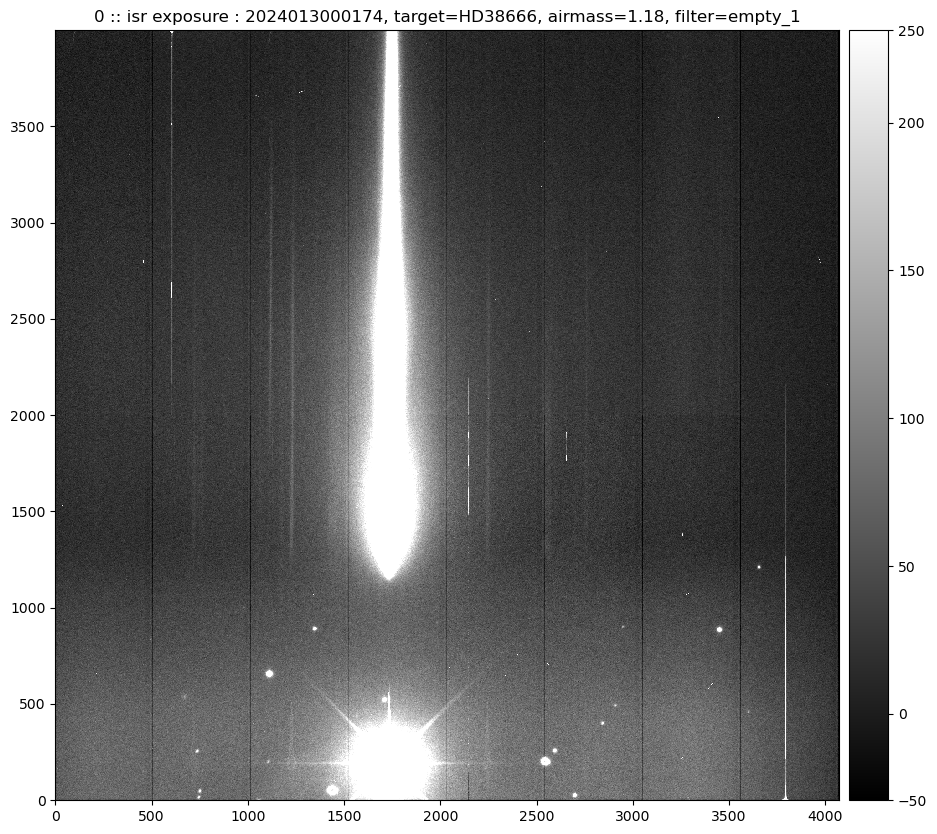

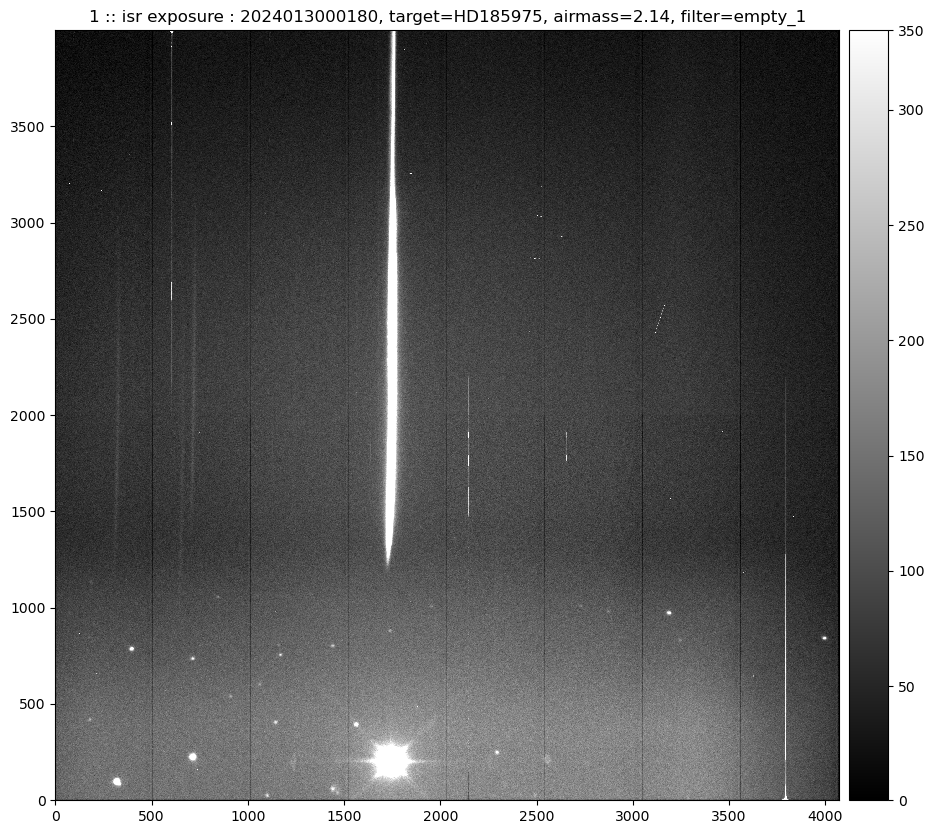

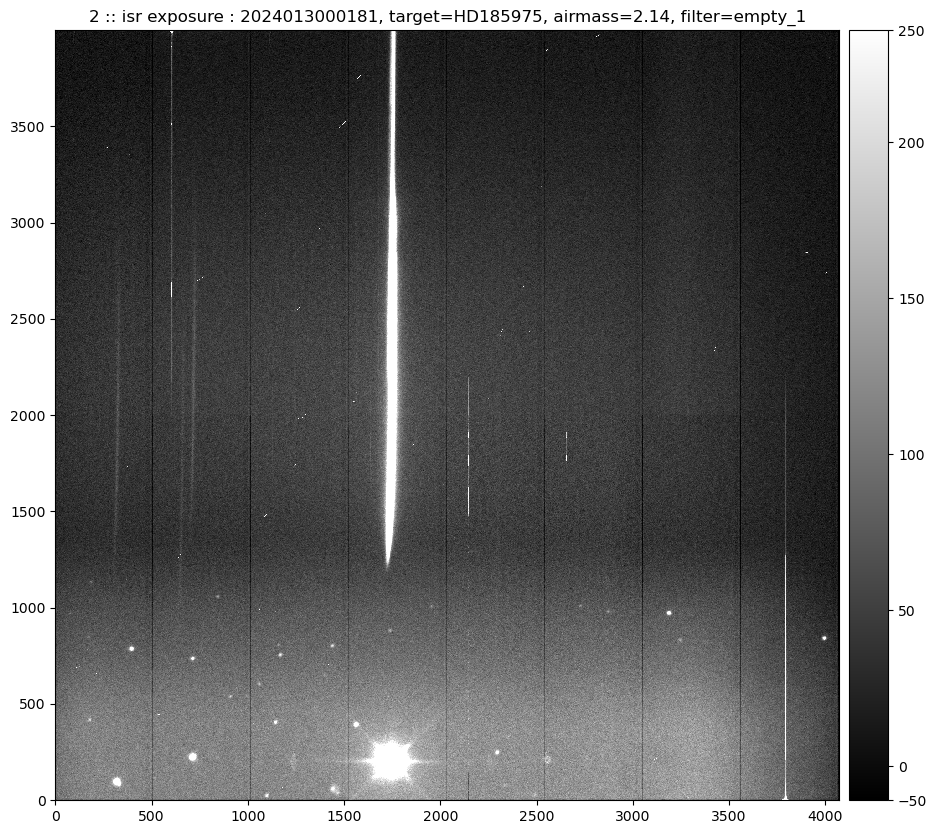

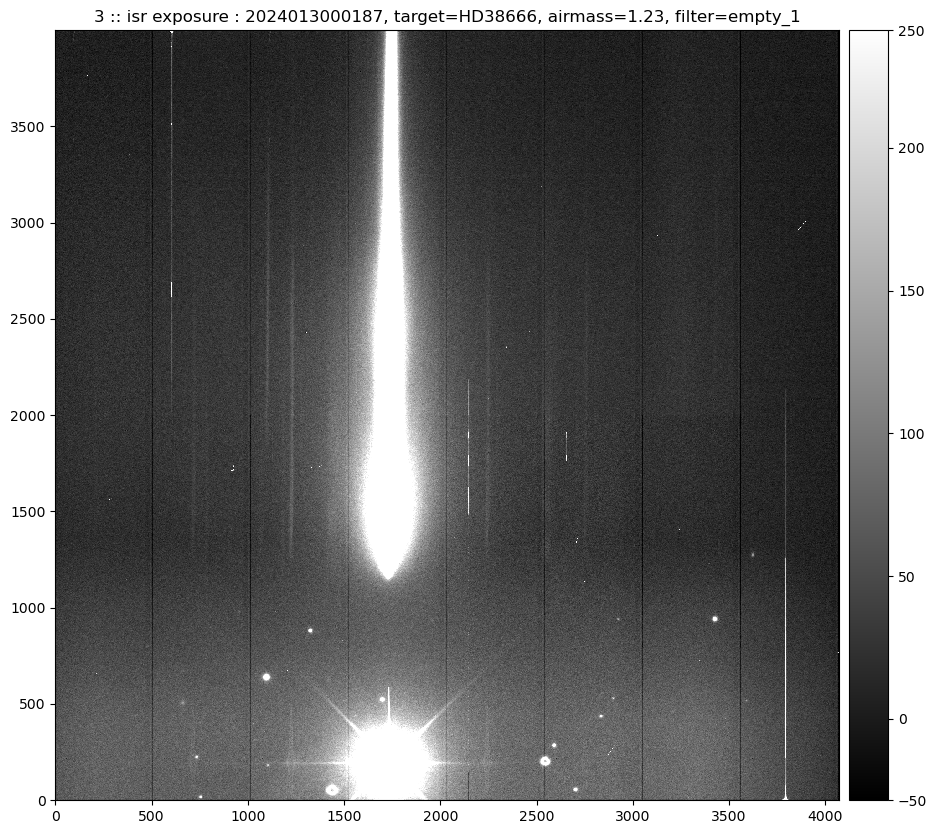

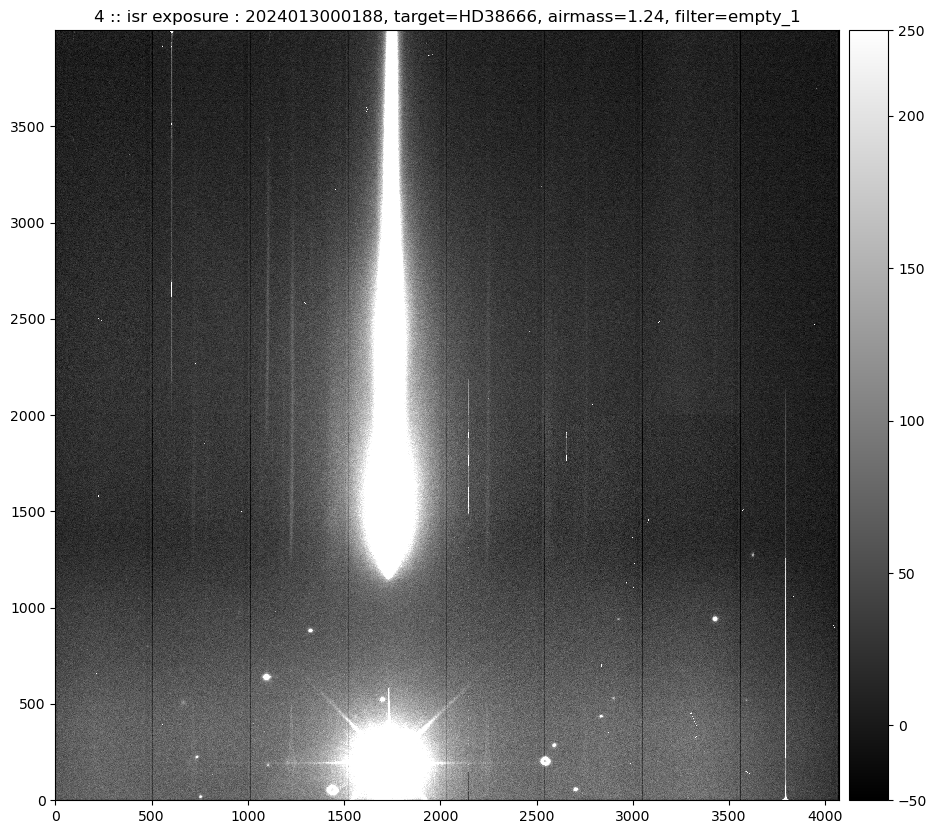

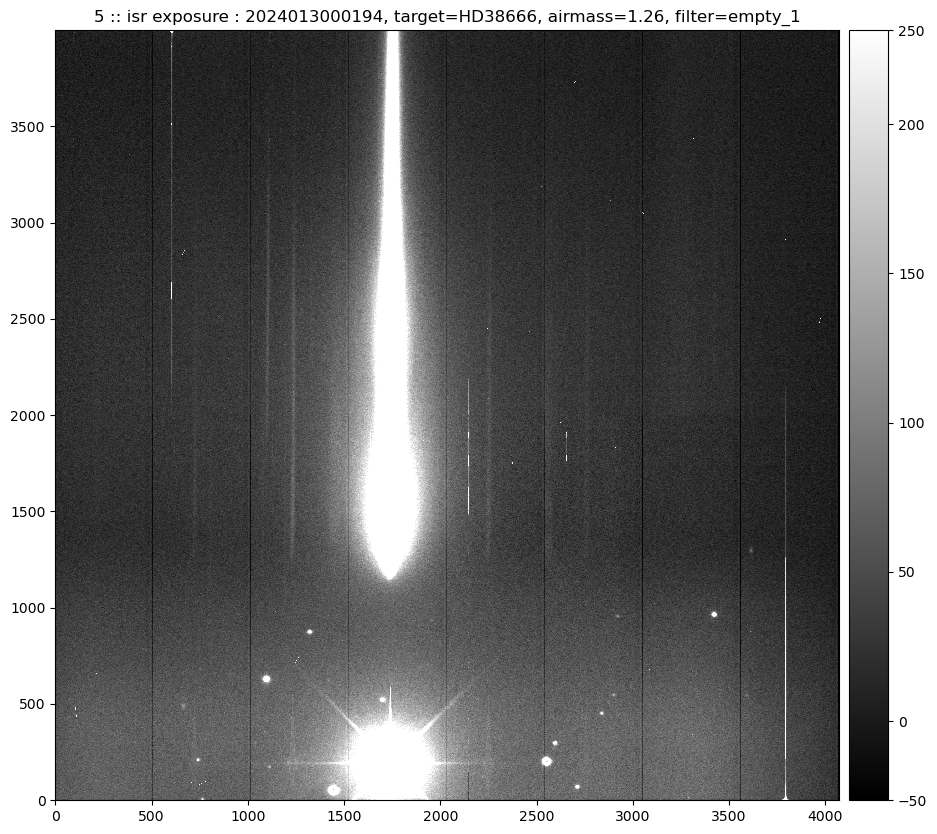

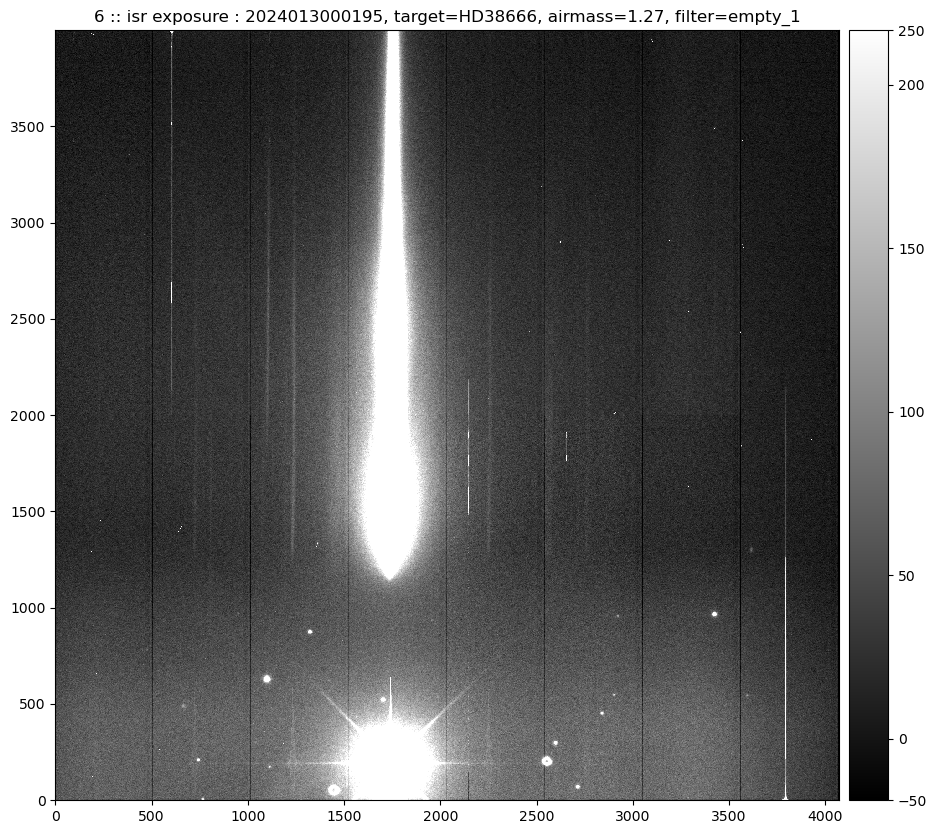

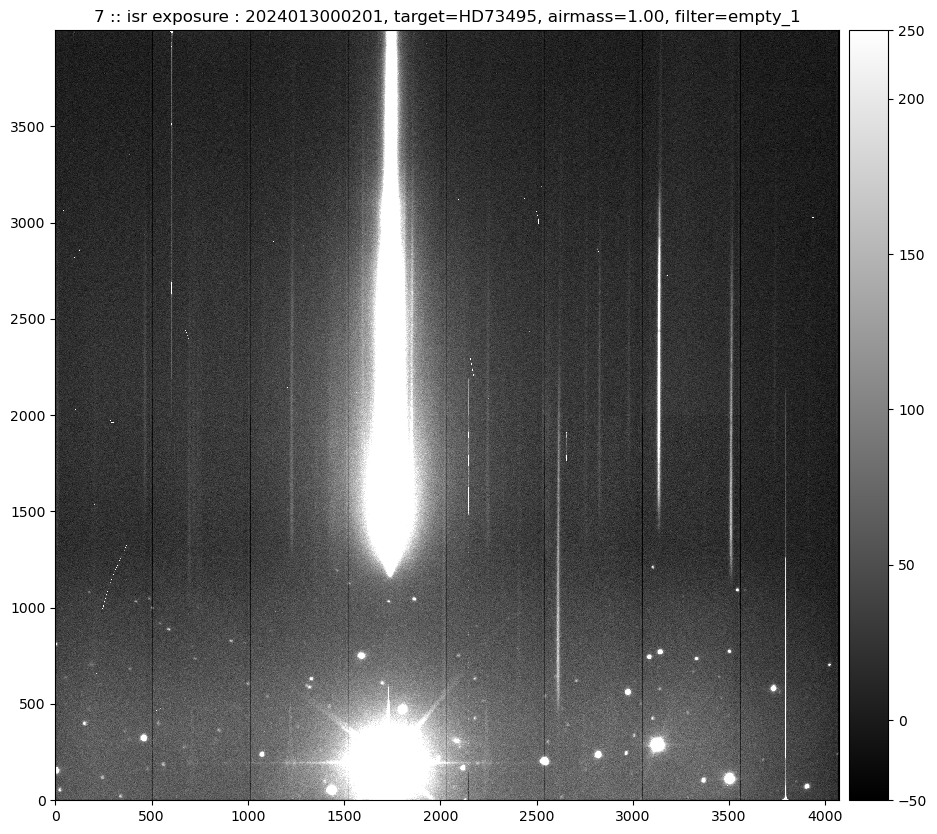

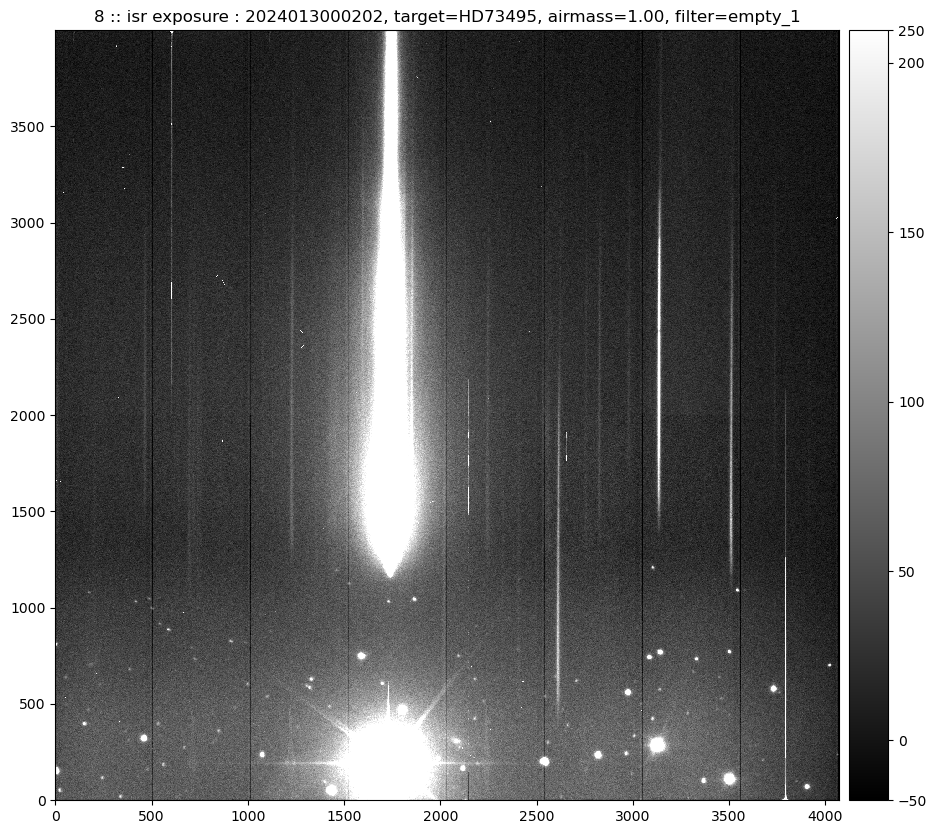

In [25]:
%matplotlib inline
if FLAG_PLOT:
    for index,row in df.iterrows():
        exposure_selected =row["date"]*100000+row["seq"]



        raw_img= butler.get('raw', dataId={'exposure': exposure_selected, 'instrument': 'LATISS', 'detector': 0}, collections = collection)
        bias = butler.get("bias",instrument=cameraName, exposure= exposure_selected , detector=0, collections=calibCollections)
        defects = butler.get('defects',instrument=cameraName, exposure= exposure_selected ,detector=0,collections=calibCollections)
    
    
            # get metadata
        bias_md = dict(bias.getMetadata())
        try:
            MB_date= bias_md['CALIB_CREATION_DATE']
            MB_time = bias_md['CALIB_CREATION_TIME']
            print(f"Exposure {exposure_selected}, DATE for Master Bias with short calib list",MB_date, MB_time)
        except:
            print("Unexpected error:", sys.exc_info()[0])
            MB_date= bias_md['CALIB_CREATE_DATE']
            MB_time = bias_md['CALIB_CREATE_TIME']
            print(f"Exposure {exposure_selected}, DATE for Master Bias with short calib list",MB_date, MB_time)

    
        defects_md = dict(defects.getMetadata()) 
        try:
            DF_date= defects_md['CALIB_CREATION_DATE']
            DF_time = defects_md['CALIB_CREATION_TIME']
            print(f"Exposure {exposure_selected}, DATE for Master Defect with short calib list",DF_date, DF_time)
        except:
            print("Unexpected error:", sys.exc_info()[0])
            DF_date= defects_md['CALIB_CREATE_DATE']
            DF_time = defects_md['CALIB_CREATE_TIME']
            print(f"Exposure {exposure_selected}, DATE for Master Defect with short calib list",DF_date, DF_time)

        meta = raw_img.getMetadata()
        md = meta.toDict()
    
        the_object = md['OBJECT']
        
        if the_object == "MU-COL":
            md['OBJECT']="HD38666"
            the_object = md['OBJECT']
            
        if the_object == "ETA1-DOR":
            md['OBJECT']="HD42525"
            the_object = md['OBJECT']
            
            
        the_am= md['AMSTART']
        the_filter=md['FILTER']
    
        #fast ISR 
        isr_img = isr_task.run(raw_img,bias=bias,defects=defects)
    
        rotated_array = isr_img.exposure.image.array[::-1,::-1] #rotate the array 180 degrees
        #np.flip(np.flip(a, 1), 0)

    
        fig = plt.figure(figsize=(12,10))
        afw_display = afwDisplay.Display(frame=fig)
        afw_display.scale('linear', 'zscale',None)
        the_title = f"{index} :: isr exposure : {exposure_selected}, target={the_object}, airmass={the_am:.2f}, filter={the_filter}"
        afw_display.mtv(isr_img.exposure.image,title=the_title)

In [26]:
# Save in files

In [27]:
for index,row in df.iterrows():
    
    exposure_selected =row["date"]*100000+row["seq"]
    
    print(f"exposure selected = {exposure_selected}")


    raw_img= butler.get('raw', dataId={'exposure': exposure_selected, 'instrument': 'LATISS', 'detector': 0}, collections = collection)
    bias = butler.get("bias",instrument=cameraName, exposure= exposure_selected , detector=0, collections=calibCollections)
    defects = butler.get('defects',instrument=cameraName, exposure= exposure_selected ,detector=0,collections=calibCollections)
    
    
    isr_img = isr_task.run(raw_img,bias=bias,defects=defects)
    
    arr=isr_img.exposure.image.array
    # 180 degree rotation
    rotated_array = arr[::-1,::-1] #rotate the array 180 degrees
    
    
    meta = raw_img.getMetadata()
    md = meta.toDict()

    the_object = md['OBJECT']
    the_am= md['AMSTART']
    the_filter=md['FILTER']
    
    if the_object == "MU-COL":
        md['OBJECT']="HD38666"
        the_object = md['OBJECT']

    filename_out = f"exposure_{exposure_selected}_pseudo-postisrccd.fits"
    fullfilename_out=os.path.join(path_out,filename_out)
    
    print(f">>>>  output filename {filename_out} object {the_object}")
    
    hdr = fits.Header()
    
    for key,value in md.items():
        if key == 'OBJECT':
            print(key,value)
        hdr[str(key)]=value
        
    # need this    
    hdr["AMEND"] = hdr["AMSTART"]
    
    # be aware weather data may be missing
    if hdr["AIRTEMP"] == None:
        hdr["AIRTEMP"] = 10.0

    if hdr["PRESSURE"] == None:
        hdr["PRESSURE"] = 744.

    if hdr["HUMIDITY"] == None:
        hdr["HUMIDITY"] = 50.

    if hdr["WINDSPD"] == None:
        hdr["WINDSPD"] = 5.

    if hdr["WINDDIR"] == None:
        hdr["WINDDIR"] = 0.   

    if hdr["SEEING"] == None:
        hdr["SEEING"] = 1.15
    
        
   
    
    # Be carefull for Spectractor, 2 hdu units are necessary
    
    primary_hdu = fits.PrimaryHDU(header=hdr)
    image_hdu = fits.ImageHDU(rotated_array)
    
    hdu_list = fits.HDUList([primary_hdu, image_hdu])
    
    hdu_list.writeto(fullfilename_out,overwrite=True)
    
    
    
    #if index>=0:
    #    break
    


exposure selected = 2024013000174


>>>>  output filename exposure_2024013000174_pseudo-postisrccd.fits object HD38666
OBJECT HD38666
exposure selected = 2024013000180


>>>>  output filename exposure_2024013000180_pseudo-postisrccd.fits object HD185975
OBJECT HD185975
exposure selected = 2024013000181


>>>>  output filename exposure_2024013000181_pseudo-postisrccd.fits object HD185975
OBJECT HD185975
exposure selected = 2024013000187


>>>>  output filename exposure_2024013000187_pseudo-postisrccd.fits object HD38666
OBJECT HD38666
exposure selected = 2024013000188


>>>>  output filename exposure_2024013000188_pseudo-postisrccd.fits object HD38666
OBJECT HD38666
exposure selected = 2024013000194


>>>>  output filename exposure_2024013000194_pseudo-postisrccd.fits object HD38666
OBJECT HD38666
exposure selected = 2024013000195


>>>>  output filename exposure_2024013000195_pseudo-postisrccd.fits object HD38666
OBJECT HD38666
exposure selected = 2024013000201


>>>>  output filename exposure_2024013000201_pseudo-postisrccd.fits object HD73495
OBJECT HD73495
exposure selected = 2024013000202


>>>>  output filename exposure_2024013000202_pseudo-postisrccd.fits object HD73495
OBJECT HD73495


In [28]:
print("finished")

finished
